In [1]:
%display latex

In [2]:
%load_ext nb_black

# Libraries

In [3]:
import numpy_financial as npf

# Notation

* $X_0$: Initial loan amount
* $T$: length of loan period in years
* $X_T$: Amount loan repaid at time T

# Effective Interest Rate, $r_e$

In [4]:
def effective_interest_rate(X_0, X_T):
    return (X_T - X_0) / X_0

# Annual Effective Interest Rate, $r$

In [5]:
def month_to_year_period(months: int) -> float:
    """
    Given a duration in terms of the number of months,
    returns the duration in terms of years
    """
    return RR(months / 12)

In [6]:
def annual_effective_interest_rate(X_0, X_T, T):
    return (X_T / X_0) ^ (1 / T) - 1

Example:

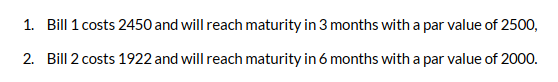

In [7]:
r_bill_1 = annual_effective_interest_rate(2450, 2500, month_to_year_period(3))
r_bill_2 = annual_effective_interest_rate(1922, 2000, month_to_year_period(6))

print(f"bill 1: {r_bill_1 * 100:.3f}%")
print(f"bill 2: {r_bill_2 * 100:.3f}%")

bill 1: 8.417%
bill 2: 8.281%


Effect of $X_0$ on annual interest rate:

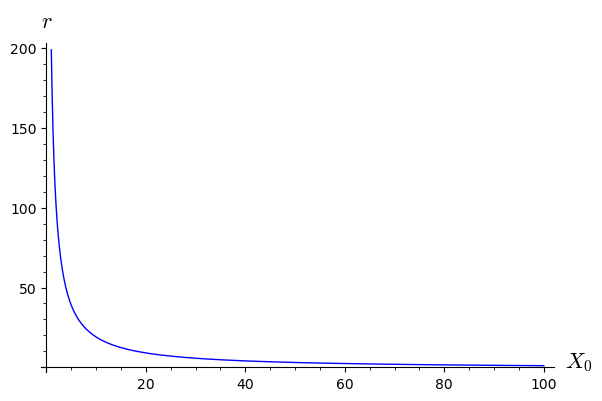

In [8]:
x0 = var("x0", latex_name="x_0")

# assume T and X_T is fixed
f(x0) = annual_effective_interest_rate(x0, 200, 1)

plot(f(x0), 1, 100, axes_labels = ['$X_0$', '$r$'])

Conclusion:

Smaller $X_0$ results in larger annual interest rate.

# Discount Factor

In [9]:
def discount_factor(r: float, T: float):
    return (1 + r)^(-T)

Impact of interest rate on discount factor:

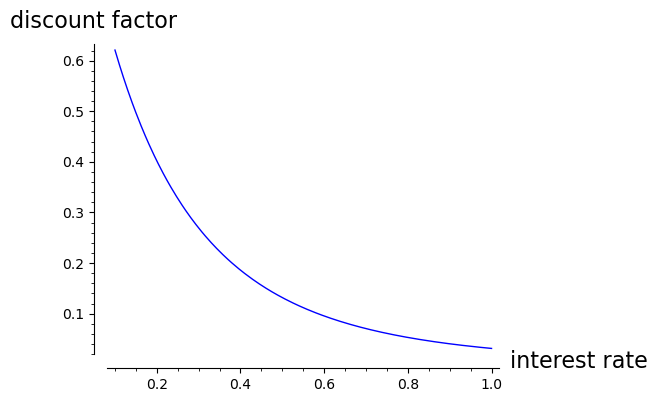

In [10]:
T = 5

plot(discount_factor(x, T), (x, 0.1, 1), axes_labels = ['interest rate', 'discount factor'])

Conclusion:

Higher interest rate results in lower discount factor

# Annual Effective Interest Rate With Periodic Compounding

In [11]:
def n_compounded_annual_effective_interest_rate(X_0, X_T, T, n=1):
    """
    Calculates the annual interest rate if it were applied n times a year
    """
    return n * (X_T/X_0)^(1/(n * T)) - n

Check:

In [12]:
n_compounded_annual_effective_interest_rate(100, 200, 1) == annual_effective_interest_rate(100, 200, 1)

True

# Discount Rate

In [13]:
def n_compounded_annual_discount_rate(X_0, X_T, T, n = 1):
    """
    Calculates the discount rate assuming interest rate is applied n times
    a year
    """
    return n - n * (X_0/X_T) * (1/(n * T))

If a deposit of 90 grows to 100 after one year:

In [14]:
annual_interest_rate = n_compounded_annual_effective_interest_rate(90, 100, 1, 1)
annual_discount_rate = n_compounded_annual_discount_rate(90, 100, 1, 1)

print(f"Annual interest rate: {RR(annual_interest_rate) * 100:.4f}")
print(f"Annual discount rate: {RR(annual_discount_rate) * 100:.4f}")

Annual interest rate: 11.1111
Annual discount rate: 10.0000


# Simple Annual Interest Rate or Annual Percentage Rate (APR)

In [15]:
def simple_annual_interest_rate(X_0, X_T, T):
    return 1/T * (X_T/X_0 - 1)

# Simple Annual Discount Rate

In [16]:
def simple_annual_discount_rate(X_0, X_T, T):
    return 1/T * (1 - X_0/X_T)

# Future Value

In [17]:
def future_value(X_0: float, T: int, apr: float, n: int) -> float:
    return X_0 * (1 + apr/n)^(n * T)

# Examples

## Example 1

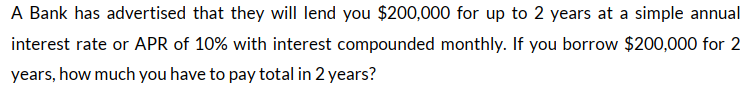

In [18]:
future_value(200000, 2, 0.10, 12)

244078.192275112

## Example 2

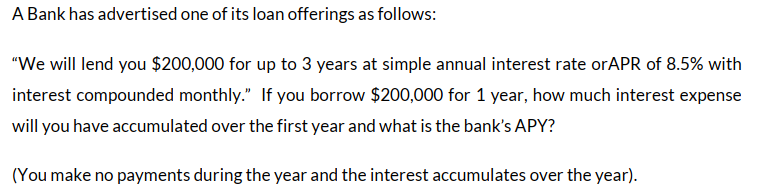

In [19]:
X_0 = 200000
APR = 8.5/100
n = 12
T = 1

In [20]:
X_T = future_value(X_0, T, APR, n)
print(f"Total interest accumulated over the first year: {X_T - X_0:,.2f}")

Total interest accumulated over the first year: 17,678.18


In [21]:
apy = annual_effective_interest_rate(X_0, X_T, T)
print(f"The bank's APY: {apy * 100:.3f}%")

The bank's APY: 8.839%


## Example 3

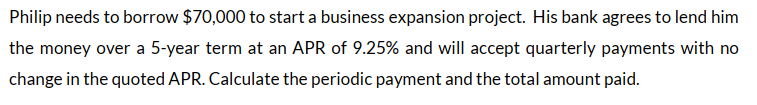

In [22]:
X_0 = 70000
apr = 9.25/100
T = 5
n = 4

In [23]:
periodic_payment = npf.pmt(rate = apr/n, nper = n * T, pv = X_0, when = 'end')
periodic_payment

-4411.15458435452

In [24]:
total_amount_paid = -1 * periodic_payment * n * T
total_amount_paid

88223.0916870904

In [25]:
total_interest_paid = total_amount_paid - X_0
total_interest_paid

18223.091687090404